In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
data = pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
X = data.drop('Sales',axis=1).values
y = data['Sales'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [7]:
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print('MSE:',mean_squared_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))


MSE: 2.9077569102710923
R2 Score: 0.9059011844150826


In [12]:
new_data = pd.DataFrame(
    {
        "TV" : [150],
        "Radio" : [20],
        "Newspaper" : [30]
    }
)

predict_new_sales = model.predict(new_data)
print("Predicted Sales for new Data :",predict_new_sales[0])

Predicted Sales for new Data : 15.039523680317235


c:\Users\srini\OneDrive\Desktop\PythonTechworks\venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


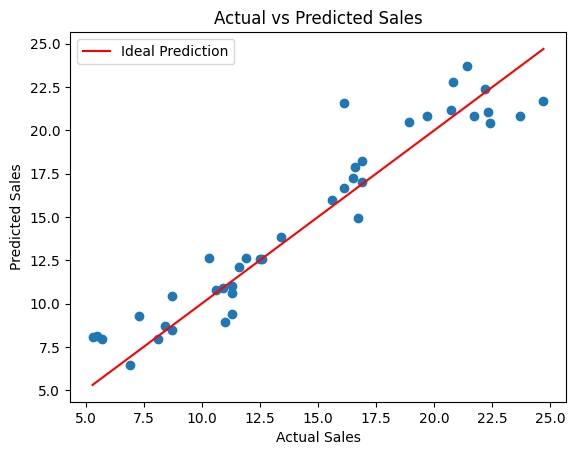

In [14]:
x_line = np.linspace(min(y_test), max(y_test), 100)
plt.scatter(y_test, y_pred)
plt.plot(x_line, x_line, color='red', linestyle='-', label='Ideal Prediction')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.show()

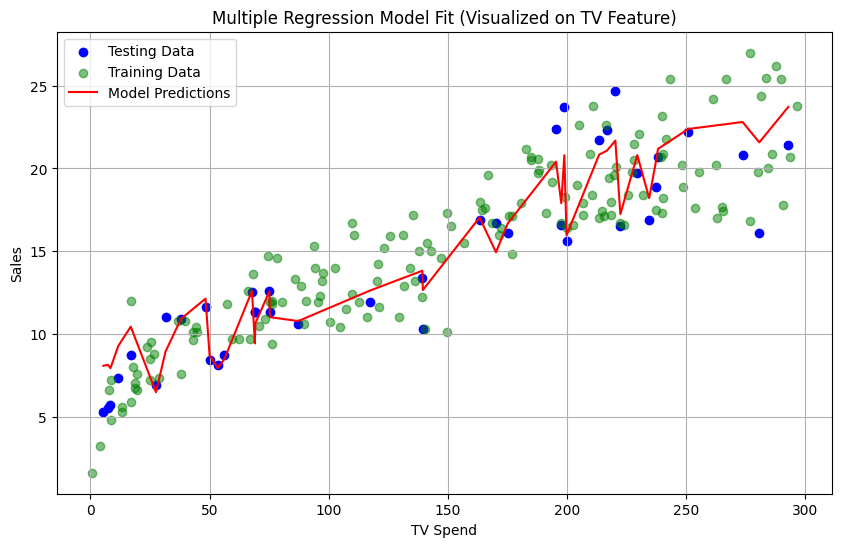

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv('advertising.csv')

# --- Multiple Regression Setup ---
# X (All Features): Drop 'Sales'
X = data.drop('Sales', axis=1).values
y = data['Sales'].values

# Split data (X_test has 3 columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Multiple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# --- FIX FOR PLOTTING ---

# 1. Select only the 'TV' feature (index 0) from the X arrays for visualization
X_test_tv = X_test[:, 0]
X_train_tv = X_train[:, 0]

# 2. Plotting (Corrected)
plt.figure(figsize=(10, 6))

# Scatter the Test data (TV vs Actual Sales)
# X_test_tv is 1D, y_test is 1D - compatible for plotting.
plt.scatter(X_test_tv, y_test, color='blue', label='Testing Data')

# Scatter the Training data (TV vs Actual Sales)
plt.scatter(X_train_tv, y_train, color='green', alpha=0.5, label='Training Data')

# Plot the Predicted values vs the actual TV spend used in the test set.
# NOTE: This line visually approximates the 3D model's plane projection onto the TV axis.
# It is not a perfect representation of the 3D plane, but it's the intended fix for the error.
# We must sort X_test_tv to avoid a jagged line.
sort_idx = X_test_tv.argsort()
plt.plot(X_test_tv[sort_idx], y_pred[sort_idx], color='red', label='Model Predictions')


plt.xlabel('TV Spend')
plt.ylabel('Sales')
plt.legend()
plt.title('Multiple Regression Model Fit (Visualized on TV Feature)')
plt.grid(True)
plt.savefig('multiple_regression_tv_visualization.png')

# 1. Simple Linear Regression (1 Feature)
#### When you have only one independent variable (e.g., TV Spend) predicting the target (Sales), the relationship exists in a 2-dimensional space.

#### y = b0 + b1x1
#### Visualization: The best-fit model is a single, straight line.


# 2. Multiple Linear Regression (2+ Features)
#### When you have two or more independent variables (e.g., TV, Radio, Newspaper) predicting the target (Sales), the relationship exists in a multi-dimensional space.

#### y = b0 + b1x1 + b2x2 + b3x3
#### Visualization: The best-fit model is a flat plane in 3D space.

#### If you have three or more features (like we did with TV, Radio, and Newspaper), the best-fit model is a hyperplane in a space with four or more dimensions, which is impossible to draw or visualize directly